# Homework Exploratory Data Analysis Day 14

# Telco Customer Churn

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Load Dataset

In [6]:
#import any necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#load dataset
df = pd.read_csv('Telco-Customer-Churn.csv', sep=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#load dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Finding:
* There is no null data
* TotalCharges' dtype is object despite being numeric

#### Action:
* No need to handle missing data
* Turn TotalCharges' dtype into numeric(float)
* Check out potential duplicated values

## Data Cleansing

In [9]:
# exclude rows with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

# transform TotalCharges column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
# check the duplicated rows
df[df.duplicated()].sum()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [11]:
# recent dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Standard Exploratory Data Analysis

#### Statistical Summary of Columns

In [12]:
categoricals = []
numericals = []

for column in df.columns:
    if df[column].dtypes == 'object':
        categoricals.append(column)
    elif (df[column].dtypes == 'float64') or (df[column].dtypes == 'int64'):
        numericals.append(column)

categoricals, numericals

(['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])

In [13]:
# numerical statistical sumary
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Findings:
* SeniorCitizen is binary, so we do not need to see its simmetricity
* tenure and MonthlyCharges have different value on median and mean, but still close enough. Let's make sure!
* TotalCharges has far different value on median and mean, we need to see its simmetricity!

In [14]:
# describe method on categorical data
df[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [15]:
# showing the precise value counts
for column in categoricals:
    print(f'Value counts of {column} column')
    print(df[column].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

#### Findings:
* There are 1869 customers who left within the last month (Churn)
* Male customers have almost similar proportion with female customers
* There are 6352 customers who has signed up for phone service, with 3385 of them using SingleLine and the rest using MultipleLines
* There are 1520 customers who do not sign up for internet service, and the rest using it.
* Several services are available for internet service users are OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, and StreamingMovies.
* Most of customers (3875) are binded by month-to-month contract
* Most of customers (4168) has used paperless billing
* Several payment methods are available like electronic check, mailed check, bank transfer, and credit card

### Univariate Analysis

#### Box Plot for Numerical Columns

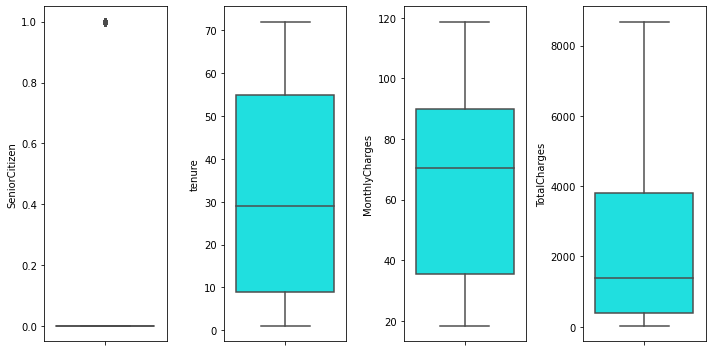

In [16]:
plt.figure(figsize=(10, 5))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='cyan')
    plt.tight_layout()

#### Histogram for Numerical Columns

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

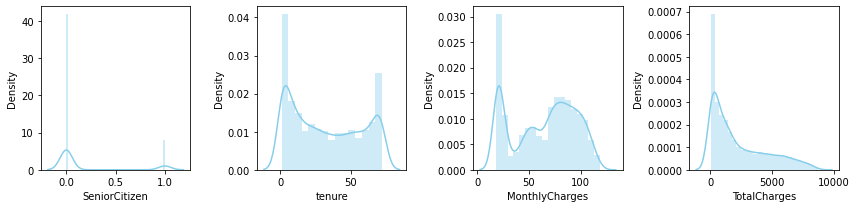

In [17]:
plt.figure(figsize=(12, 3))
for i in range(0, len(numericals)):
    plt.subplot(1, 4, i+1)
    sns.distplot(x=df[numericals[i]], color='skyblue')
    plt.xlabel(numericals[i])
    plt.tight_layout()

#### Findings:
* There are much more non-SeniorCitizen. We can ignore interpreting the feature column
* tenure and MonthlyCharges show bimodal distribution
* There may be two majority group of customers based on tenure: new customers and loyal customer (has stayed for 72 months)
* The mode of MonthlyCharges is located between minimum value (18.2500) and first quantile (35.5875)
* TotalCharges shows right (positive) skewed distribution

#### PIe Chart for Categorical Columns

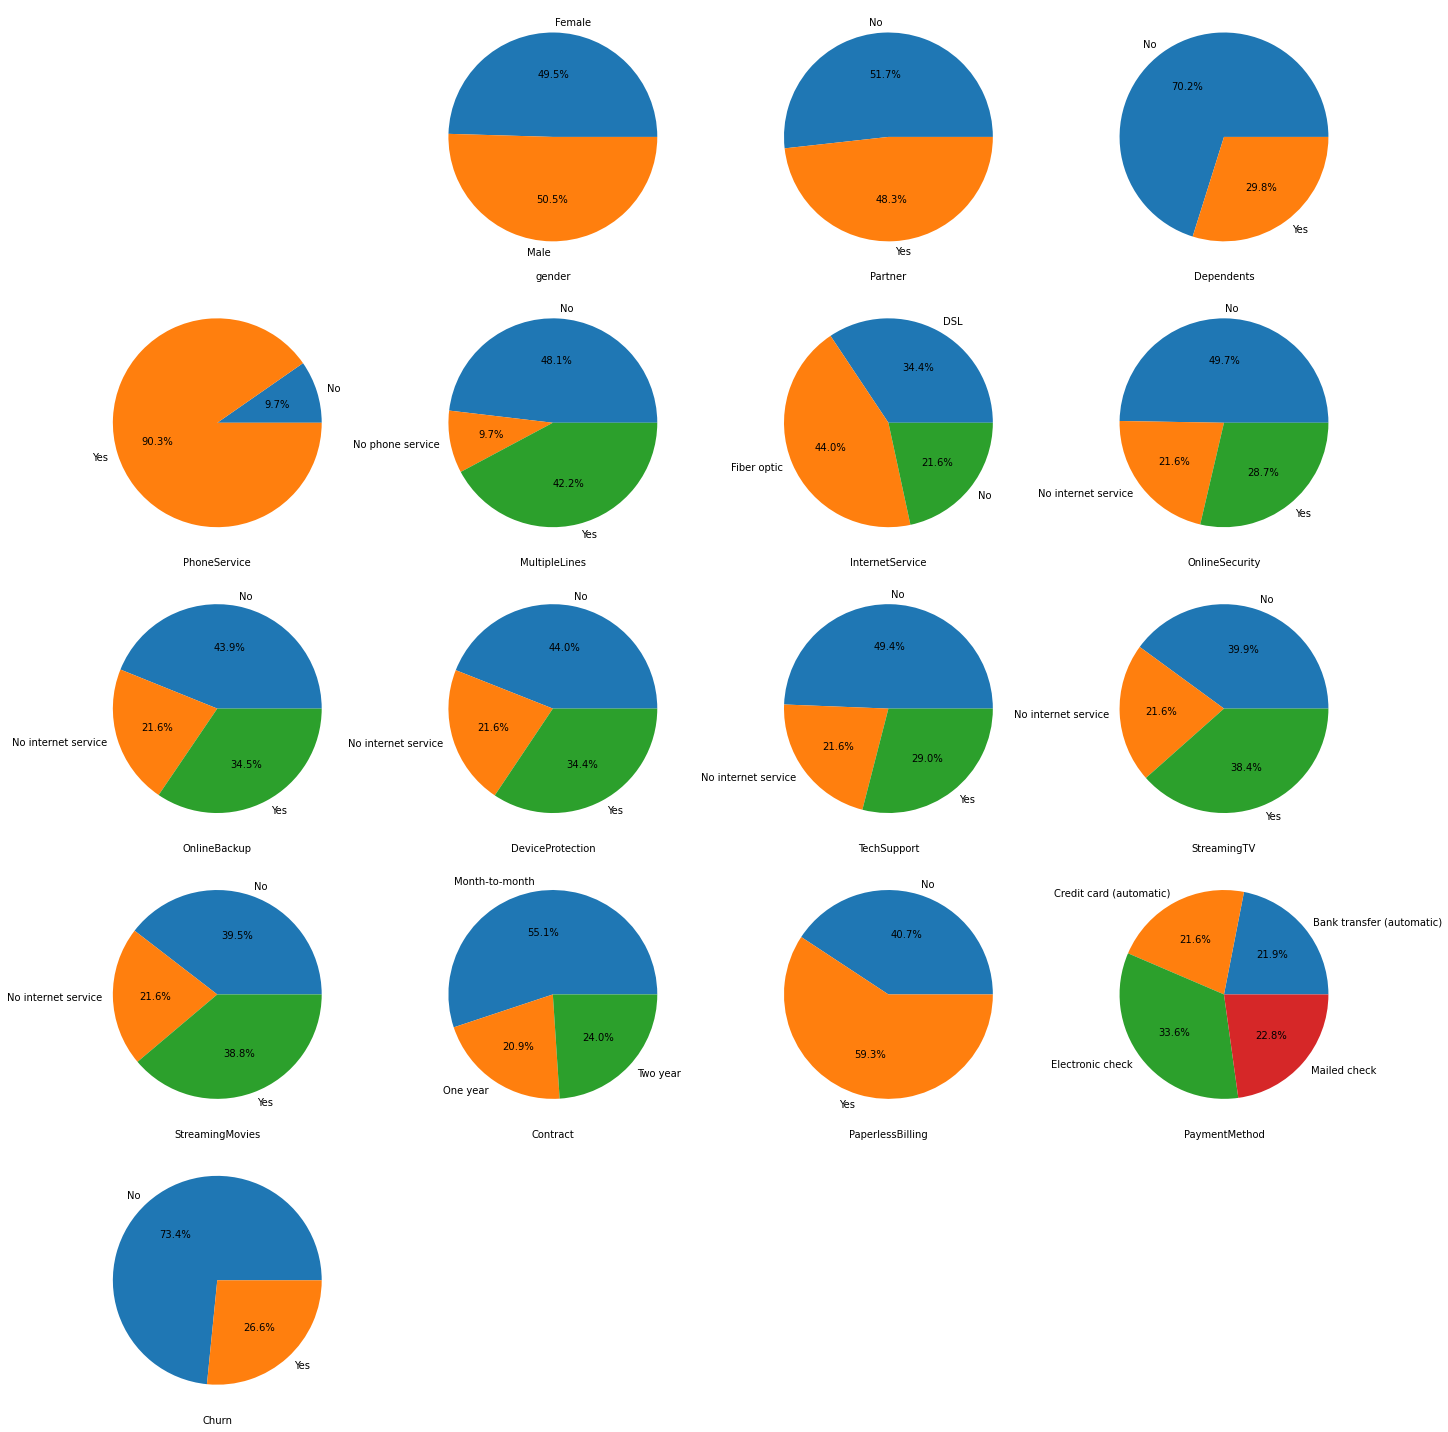

In [18]:
plt.figure(figsize=(20, 20))
for i in range(0, len(categoricals)):
    if categoricals[i] != 'customerID':
        subset = pd.DataFrame(df.groupby(categoricals[i]).size()).reset_index()
        plt.subplot(5, len(categoricals)//5 + 1, i+1)
        plt.pie(x=subset[0], labels=subset[categoricals[i]], autopct='%1.1f%%') 
        plt.xlabel(categoricals[i])
        plt.tight_layout()

#### Findings:
* OnlineSecurity and TechSupport have almost similar distribution
* OnlineBackup, DeviceProtection, StreamingTV, and StreamingMovies have almost similar distribution
* We may need to see those columns' correlation via bivariate analysis, may be high!

### Multivariate Analysis

In [19]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
#label encoding
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
for i in range(0, len(categoricals)):
    df[f'{categoricals[i]}Code'] = ord_enc.fit_transform(df[[categoricals[i]]])
    print(f'Label encoding for {categoricals[i]} column')
    df_encode = df[[categoricals[i], f'{categoricals[i]}Code']]
    print(pd.unique(df_encode[[categoricals[i], f'{categoricals[i]}Code']].values.ravel()), '\n')

Label encoding for customerID column
['7590-VHVEG' 5365.0 '5575-GNVDE' ... 5923.0 '3186-AJIEK' 2221.0] 

Label encoding for gender column
['Female' 0.0 'Male' 1.0] 

Label encoding for Partner column
['Yes' 1.0 'No' 0.0] 

Label encoding for Dependents column
['No' 0.0 'Yes' 1.0] 

Label encoding for PhoneService column
['No' 0.0 'Yes' 1.0] 

Label encoding for MultipleLines column
['No phone service' 1.0 'No' 0.0 'Yes' 2.0] 

Label encoding for InternetService column
['DSL' 0.0 'Fiber optic' 1.0 'No' 2.0] 

Label encoding for OnlineSecurity column
['No' 0.0 'Yes' 2.0 'No internet service' 1.0] 

Label encoding for OnlineBackup column
['Yes' 2.0 'No' 0.0 'No internet service' 1.0] 

Label encoding for DeviceProtection column
['No' 0.0 'Yes' 2.0 'No internet service' 1.0] 

Label encoding for TechSupport column
['No' 0.0 'Yes' 2.0 'No internet service' 1.0] 

Label encoding for StreamingTV column
['No' 0.0 'Yes' 2.0 'No internet service' 1.0] 

Label encoding for StreamingMovies column


In [21]:
df = df.drop(columns='customerIDCode')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineSecurityCode,OnlineBackupCode,DeviceProtectionCode,TechSupportCode,StreamingTVCode,StreamingMoviesCode,ContractCode,PaperlessBillingCode,PaymentMethodCode,ChurnCode
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0


<AxesSubplot:>

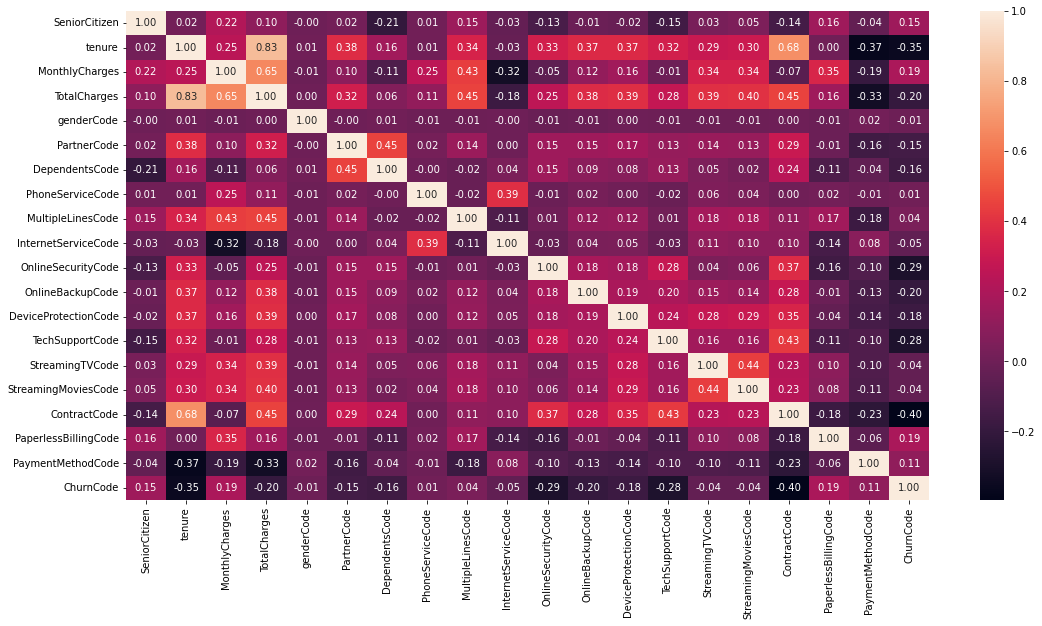

In [22]:
#correlation heatmap

plt.figure(figsize=(18, 9))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

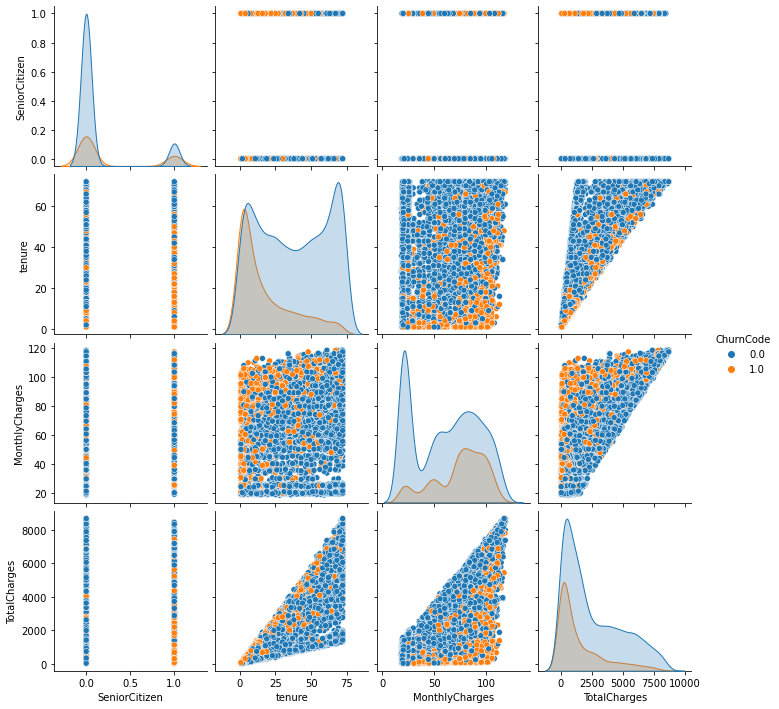

In [23]:
# pairplot of the data
col2 = numericals
col2.append('ChurnCode')
df2 = df[col2]
sns.pairplot(df2, hue='ChurnCode')

#### Findings:
with 0 = No churn, 1 = Churn
* Most of churned customers have shorter tenure
* Most of non-SeniorCitizen do not churn
* The customers who have longer tenure and paid less MonthlyCharges are not likely to churn
* TotalCharges and tenure have strong correlation. the longer tenure, the higher TotalCharges
* The higher MonthlyCharges, the higher TotalCharges
* Contract and tenure have slight strong correlation, we may check it by boxplot
* Several services like MultipleLines, OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies and Type of Contract with TotalCharges may have correlation we need to see further

## Deep  Dive Exploration 

### What is the characateristics of churned customers?

#### based on Age (SeniorCitizen)

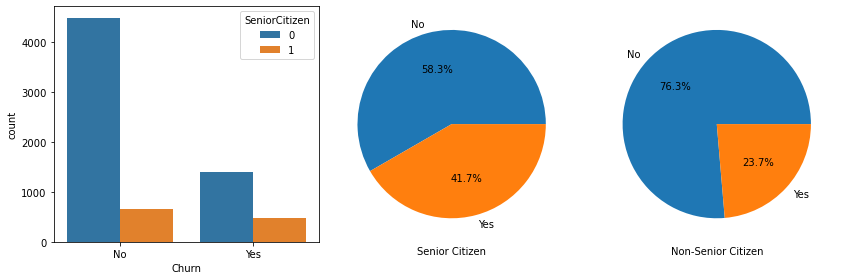

In [59]:
dfseniorcitizen = df.groupby(['SeniorCitizen', 'Churn']).size().to_frame().reset_index()
dfsenior = dfseniorcitizen[dfseniorcitizen['SeniorCitizen']==1]
dfnonsenior = dfseniorcitizen[dfseniorcitizen['SeniorCitizen']==0]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Churn', hue='SeniorCitizen')

plt.subplot(1, 3, 2)
plt.pie(x=dfsenior[0], labels=dfsenior['Churn'], autopct='%1.1f%%') 
plt.xlabel('Senior Citizen')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.pie(x=dfnonsenior[0], labels=dfnonsenior['Churn'], autopct='%1.1f%%') 
plt.xlabel('Non-Senior Citizen')
plt.tight_layout()

* The percentage of churned customers between senior citizen is higher than customers in nonsenior citizen

#### look for contract type and its tenure period length correlation

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

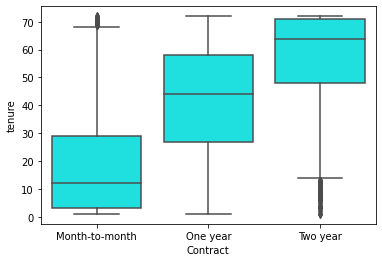

In [27]:
sns.boxplot(x=df['Contract'], y=df['tenure'], color='cyan')

* the longer contract type, the longer tenure period. Which is make sense!

#### Churned customers based on their contract type

<AxesSubplot:xlabel='Contract', ylabel='count'>

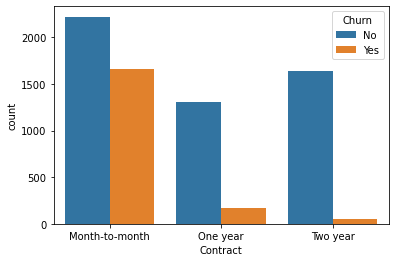

In [28]:
sns.countplot(data=df, x='Contract', hue='Churn')

* Customers who have shorter contract type, i.e. Month-to-Month get the highest rate of churn
* While the longer contract type, i.e. one year or two year are very unlikely to churn

#### based on tenure period length

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

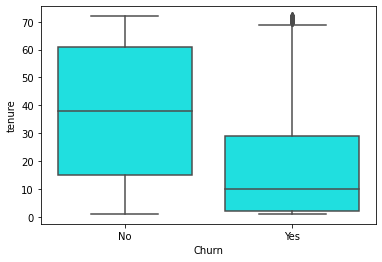

In [24]:
sns.boxplot(x=df['Churn'], y=df['tenure'], color='cyan')

* The churned customers have less tenure, usually less than 1 month until 30 months. 

#### based on Monthly Charges and TotalCharges

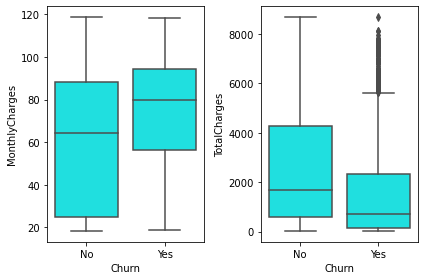

In [68]:
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'], color='cyan')
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Churn'], y=df['TotalCharges'], color='cyan')
plt.tight_layout()

In [67]:
df.groupby(['gender', 'Churn']).agg(median_MonthlyCharges=('MonthlyCharges', 'median'), 
                                    median_TotalCharges=('TotalCharges', 'median')).sort_values('median_MonthlyCharges', ascending=False)

,,median_MonthlyCharges,median_TotalCharges
gender,Churn,,
Female,Yes,79.650,663.05
Male,Yes,79.625,740.15
Female,No,64.525,1716.65
Male,No,64.400,1654.60


* The churned customers generally pay more for monthly charges
* The churned customers generally pay lower total charges

#### Which service leads to higher MonthlyCharges

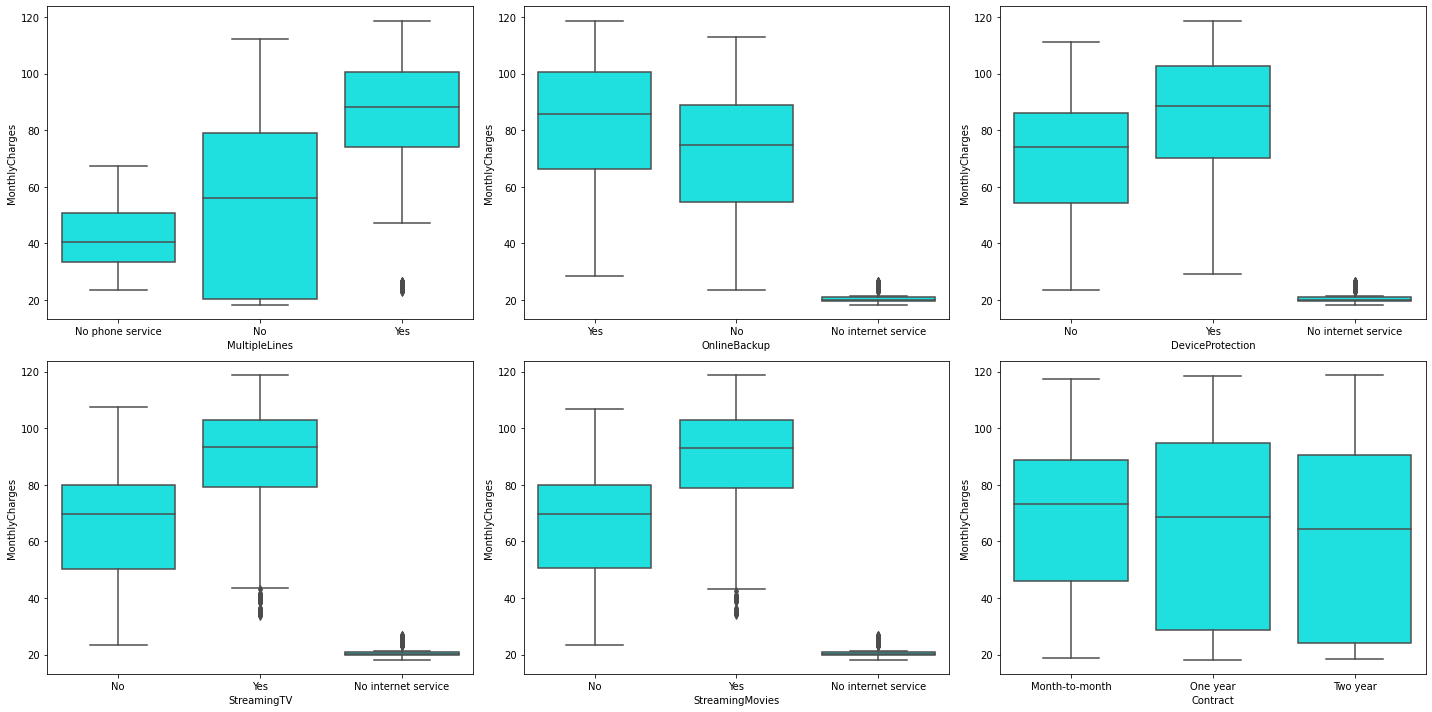

In [60]:
col3 = ['MultipleLines', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract']

plt.figure(figsize=(20, 10))
for i in range(0, len(col3)):
    plt.subplot(2, len(col3)//2, i+1)
    sns.boxplot(x=df[col3[i]], y=df['MonthlyCharges'], color='cyan')
    plt.tight_layout()

#sns.boxplot(x=df['OnlineBackup'], y=df['TotalCharges'])

* MonthlyCharges will be higher if the customer signed up for these services (MultipleLines, OnlineBackup, DeviceProtection, StreamingTv, and StreamingMovies) which is make sense!
* The month-to-month contract has lower variance with others, but almost similar median. Which means the MonthlyCharges do not depend much on the type of contract, but the service provided

#### Which Internet Service pay more Monthly Charges?

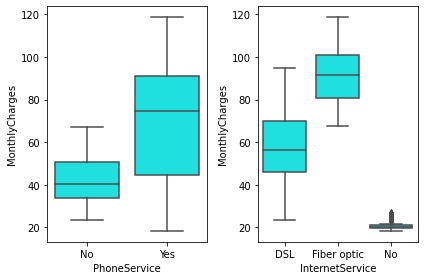

In [66]:
plt.subplot(1, 2, 1)
sns.boxplot(x=df['PhoneService'], y=df['MonthlyCharges'], color='cyan')
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.boxplot(x=df['InternetService'], y=df['MonthlyCharges'], color='cyan')
plt.tight_layout()

* The customers who get phone service pay more MonthlyCharges
* The customers who use InternetService via FiberOptic pay more than DSL

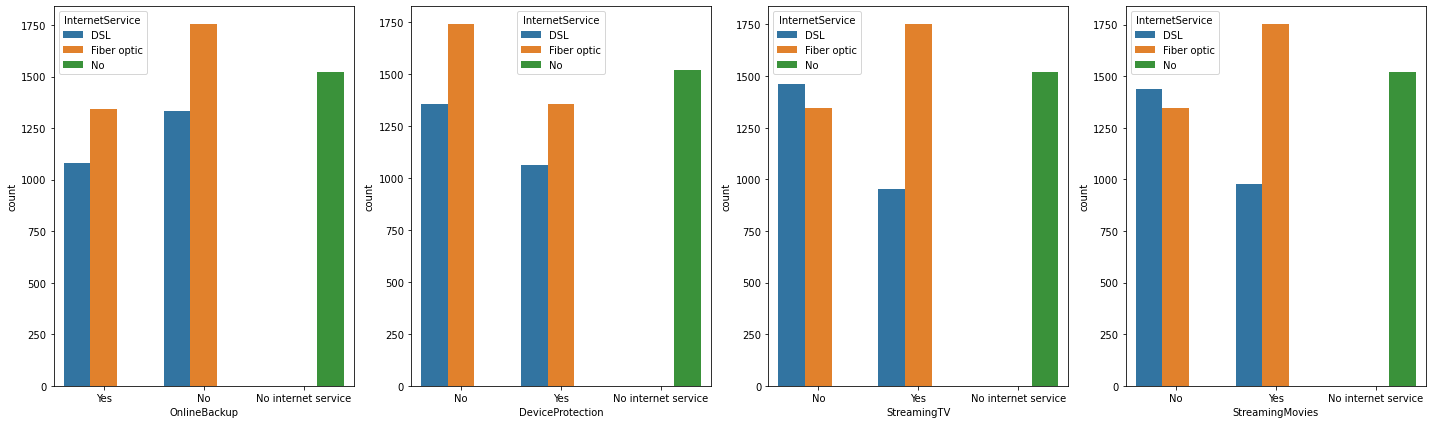

In [82]:
col5 = ['OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 6))
for i in range(0, len(col5)):
    plt.subplot(1, 4, i+1)
    sns.countplot(data=df, x=col5[i], hue='InternetService')
    plt.tight_layout()

* No prominet difference between customers who use OnlineBackup and DeviceProtection
* The customers who use StreamingTV and StreamingMovies via Fiber Optic network are more than the one who use DSL
* While the customers who do not sign for those services have no significant preference between Fiber Optic and DSL
* It could mean that the customers who need for StreamingTV and StreamingMovies prefer Fiber Optic more than DSL, while for OnlineBackup and DeviceProtection service do not depend on either FiberOptic or DSL.

In [88]:
df.groupby(['InternetService', 'StreamingTV', 'Churn']).size().to_frame().reset_index().sort_values(by=['Churn', 0], ascending=False)

,InternetService,StreamingTV,Churn,0
7,Fiber optic,Yes,Yes,687
5,Fiber optic,No,Yes,610
1,DSL,No,Yes,332
3,DSL,Yes,Yes,127
9,No,No internet service,Yes,113
8,No,No internet service,No,1407
0,DSL,No,No,1131
6,Fiber optic,Yes,No,1063
2,DSL,Yes,No,826
4,Fiber optic,No,No,736


* There is no significant different between the numbers of churned customers based on Fiber Optic user who use StreamingTV or not. The quality of StreamingTV may not effect churn

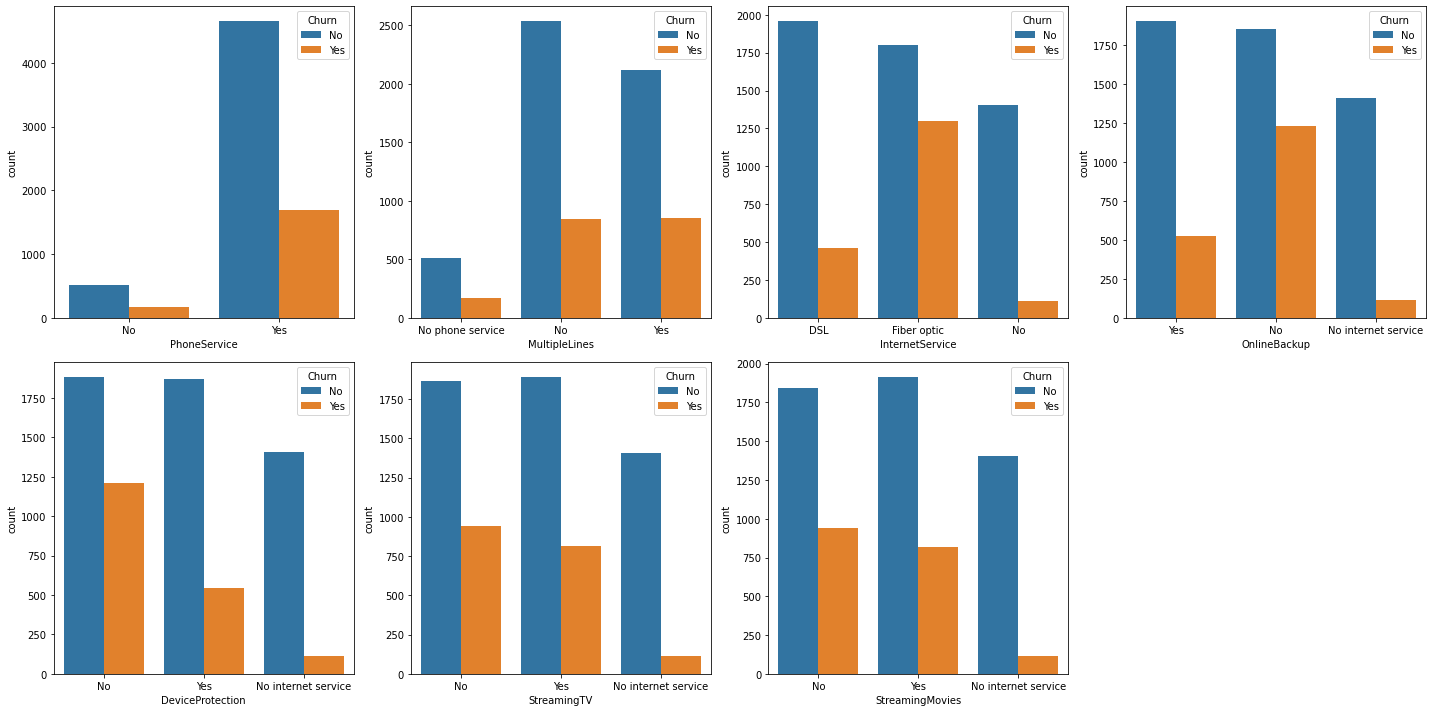

In [65]:
col4 = ['PhoneService', 'MultipleLines','InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 10))
for i in range(0, len(col4)):
    plt.subplot(2, len(col4)//2+1, i+1)
    sns.countplot(data=df, x=col4[i], hue='Churn')
    plt.tight_layout()

* There is no significant diffrence in PhoneService and MultipleLines which lead to churned customers.
* There are more churned customers who use Fiber Optic internet than DSL
* There is no significant diffrence in StreamingTV and StreamingMovies which lead to churned customers.
* There are more churned customers who do not use OnlineBackup and DeviceProtection service 

## General Observation:

* The customers who have longer contract type generally have longer tenure. They are unlikely to churn
* The opposite, the customers who have shorter contract type and shorter tenure get higher possibility to churn, so the strategy of retention necessary for this type of customer.
* The senior citizen have only slight difference on churn proportion. While the nonsenior customers are unlikely to churn. We should approach the senior citizen more to lower the churn proportion.
* The churned customers tend to pay more MonthlyCharges, but lower TotalCharges.
* The MonhtlyCharges do not depend on the type of contract, but depend heavily on service
* The customers who use Fiber Optic Internet pay more expensive MonthlyCharges, but more likely to churn than DSL one. We should assess and evaluate our fiber optic internet service.
* The customers usually prefer Fiber Optic for these services: OnlineBackup, DeviceProtection, StreamingMovies, and StreamingTV which also lead to higher MonthlyCharges
* but there are more customers who choose DSL if they do not use Streaming service
* There are significant difference on churned customers for the one who use OnlineBackup and DeviceProtection and not. We shuld devise these service to drop the churn rate.

### Action:
the strategy of retention is necessary for:
* senior customers
* month-to-month contract and shorter tenure customers
* The fiber optic customers by improve our fiber optic network reliability
* We should offer OnlineBackup and DeviceProtection service more